## This EDA analysis we want to consider each categroy of questions (sincere and insincere) separately.
### By doing this distinction we hope to better understand the differences between the two categories from a text structure point of view. 

In [2]:
# import the neccessary libraries
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from pandas import concat
from pandas.plotting import lag_plot
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
from pandas import set_option
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk import ne_chunk_sents
from nltk.tokenize import sent_tokenize
from nltk import pos_tag
pd.option_context('display.max_colwidth', 250)

In [3]:
# inserisci il tuo dataset invece di 'Train2.csv'
data = pd.read_csv('Train2.csv')

In [4]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')

In [5]:
# find number of phrases per question
num_phrases_per_question = []
for i in data['question_text']:
    num_phrases_per_question.append(len(tokenizer.tokenize(i)))
  
data.insert(loc = 2, column = 'num_phrases_per_question', value = num_phrases_per_question)

In [6]:
# find number tokens per question
question_length = []
for i in data['question_text']:
    question_length.append(len(i.split(' ')))

data.insert(loc = 3, column = 'num_tokens', value = question_length)    

In [7]:
# uncomment this line to write dataset with the two new features 
# data.to_csv('train_data_new_features.csv')

In [8]:
# get questions labled as insincere
target1 = data[data['target'] == 1] 

# get questions labeled as sincere
target0 = data[data['target'] == 0]

In [9]:
target1.head(10)

,Unnamed: 0,qid,num_phrases_per_question,num_tokens,question_text,target
22,22,0000e91571b60c2fb487,1,11,Has the United States become the largest dicta...,1
30,30,00013ceca3f624b09f42,2,15,Which babies are more sweeter to their parents...,1
110,110,0004a7fcb2bf73076489,1,15,If blacks support school choice and mandatory ...,1
114,114,00052793eaa287aff1e1,4,34,I am gay boy and I love my cousin (boy). He is...,1
115,115,000537213b01fd77b58a,1,6,Which races have the smallest penis?,1
119,119,00056d45a1ce63856fc6,1,6,Why do females find penises ugly?,1
127,127,0005de07b07a17046e27,2,16,How do I marry an American woman for a Green C...,1
144,144,00068875d7c82a5bcf88,1,26,Why do Europeans say they're the superior race...,1
156,156,0006ffd99a6599ff35b3,1,16,Did Julius Caesar bring a tyrannosaurus rex on...,1
167,167,00075f7061837807c69f,1,27,In what manner has Republican backing of 'stat...,1


Text(0.5,1,'Sincere Questions')

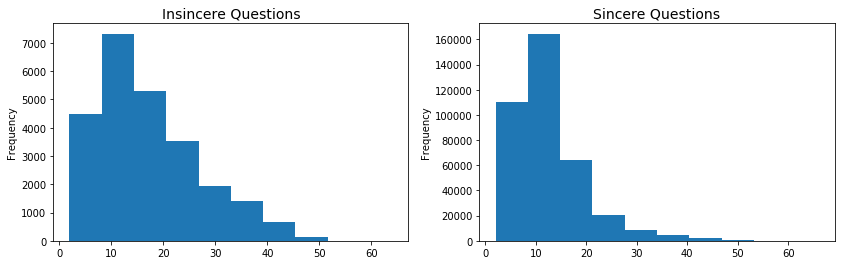

In [10]:
fig, axarr = plt.subplots(1, 2, figsize=(14,4))

# histagrams show how the number of tokens in sincere and insincere questions is distributed in the two classes
target1['num_tokens'].plot.hist(ax=axarr[0])
axarr[0].set_title("Insincere Questions", fontsize=14)

target0['num_tokens'].plot.hist(ax=axarr[1])
axarr[1].set_title("Sincere Questions", fontsize=14)

Text(0.5,1,'Sincere Questions')

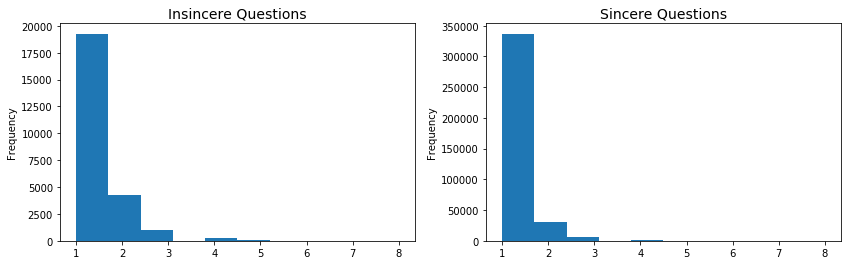

In [11]:
fig, axarr = plt.subplots(1, 2, figsize=(14,4))

# histagrams show how the number of number of phrases per question is distributed in the two classes
target1['num_phrases_per_question'].plot.hist(ax=axarr[0])
axarr[0].set_title("Insincere Questions", fontsize=14)

target0['num_phrases_per_question'].plot.hist(ax=axarr[1])
axarr[1].set_title("Sincere Questions", fontsize=14)

In [12]:
# some descriptive stats about number of tokens for questions in each class
pd.set_option('float_format', '{:f}'.format)
print('--> Sincere Questions Descriptive Statistics related to number of tokens per question')
print(target0['num_tokens'].describe())
print('----------------------------------------------------')
print('--> InSincere Questions Descriptive Statistics related to number of tokens per question')
print(target1['num_tokens'].describe())

--> Sincere Questions Descriptive Statistics related to number of tokens per question
count   375183.000000
mean        12.505857
std          6.747162
min          2.000000
25%          8.000000
50%         11.000000
75%         15.000000
max         66.000000
Name: num_tokens, dtype: float64
----------------------------------------------------
--> InSincere Questions Descriptive Statistics related to number of tokens per question
count   24818.000000
mean       17.285478
std         9.588697
min         2.000000
25%        10.000000
50%        15.000000
75%        23.000000
max        64.000000
Name: num_tokens, dtype: float64


In [13]:
# some descriptive stats about number of phrases per question in each of the two classes
print('INsincere Questions Descriptive Statistics related to number of phrases per question')
print(target1['num_phrases_per_question'].describe())
print('--------------------------------------------')
print('Sincere Questions Descriptive Statistics related to number of phrases per question')
print(target0['num_phrases_per_question'].describe())

INsincere Questions Descriptive Statistics related to number of phrases per question
count   24818.000000
mean        1.295028
std         0.628076
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: num_phrases_per_question, dtype: float64
--------------------------------------------
Sincere Questions Descriptive Statistics related to number of phrases per question
count   375183.000000
mean         1.128055
std          0.421209
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: num_phrases_per_question, dtype: float64


In [14]:
# sincere questions as a list
sincere_questions = []
for w in target0['question_text']:
       sincere_questions.append(w)

In [15]:
# insincere questions as a list 
insincere_questions = []
for w in target1['question_text']: 
    insincere_questions.append(w)

In [16]:
len(insincere_questions)

24818

In [17]:
# wordcloud graphics for each of the categories, sincere and insincere
# here we consider sincere questions
tokenizer = RegexpTokenizer('\w+')
allwords = ' '.join(sincere_questions)
print(type(allwords))
tokens = tokenizer.tokenize(allwords)

words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


<class 'str'>


In [18]:
sw = nltk.corpus.stopwords.words('english')

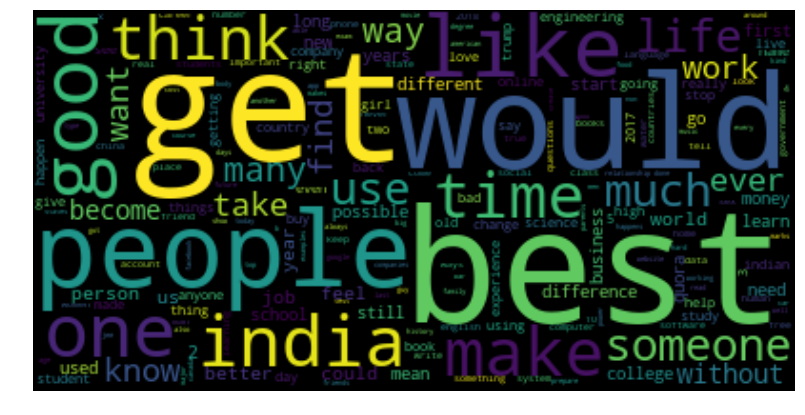

In [19]:
words_sin = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_sin.append(word)

# Create freq dist and plot
freqdist_sin = nltk.FreqDist(words_sin)

# here I add a word cloud graphics which shows the most common words

wcloud = WordCloud().generate_from_frequencies(freqdist_sin)
plt.figure(figsize=(16,7))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show() 

<Figure size 432x288 with 0 Axes>

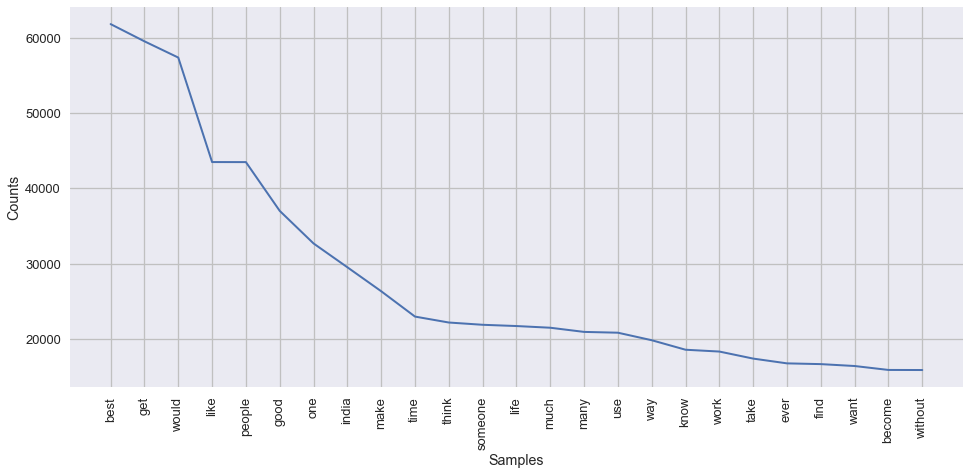

In [227]:
# plot the frequency of the words in sincere questions
# adjust the plot margins.
plt.subplots_adjust(left=0.15, bottom=0.25, right=0.9, top=0.8)
plt.figure(figsize=(16,7))
# Figures inline and set visualization style
# matplotlib inline
sns.set()
sns.set_context("talk")
freqdist_sin.plot(25)

## NER(Name Entity Recognition) and POS(Part Of Speech) recognition analysis

In [17]:
# NER 
# Tokenize the article into sentences: sentences


# printing out a random sample of questions labeled insincere
'''
import random

rand_sincere_questions = []

q_index = random.sample(data.index[data.target == 1].tolist(), 80800)
for i in q_index:
    rand_sincere_questions.append(data.iloc[i, 1])

allwords_sincere = ' '.join(rand_sincere_questions)
    
sentences = sent_tokenize(allwords_sincere)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)
            
# find POS 
pos_sincere = []
for sent in chunked_sentences:
     for chunk in sent:
        if hasattr(chunk, "label") == False:
            pos_sincere.append(str(chunk[1]))
           #print('chunk = '+str(chunk[0])+' ,'+str(chunk[1]))    

print(len(pos_sincere))

from collections import Counter
di = {}
di = Counter(pos_sincere)
di.most_common()
'''

'\nimport random\n\nrand_sincere_questions = []\n\nq_index = random.sample(data.index[data.target == 1].tolist(), 80800)\nfor i in q_index:\n    rand_sincere_questions.append(data.iloc[i, 1])\n\nallwords_sincere = \' \'.join(rand_sincere_questions)\n    \nsentences = sent_tokenize(allwords_sincere)\n\n# Tokenize each sentence into words: token_sentences\ntoken_sentences = [word_tokenize(sent) for sent in sentences]\n\n# Tag each tokenized sentence into parts of speech: pos_sentences\npos_sentences = [pos_tag(sent) for sent in token_sentences]\n\n# Create the named entity chunks: chunked_sentences\nchunked_sentences = ne_chunk_sents(pos_sentences, binary=True)\n\n# Test for stems of the tree with \'NE\' tags\n\nfor sent in chunked_sentences:\n    for chunk in sent:\n        if hasattr(chunk, "label") and chunk.label() == "NE":\n            print(chunk)\n            \n# find POS \npos_sincere = []\nfor sent in chunked_sentences:\n     for chunk in sent:\n        if hasattr(chunk, "label"

In [18]:
'''
from collections import Counter
di = {}
di = Counter(pos_sincere)
di.most_common()
'''

'\nfrom collections import Counter\ndi = {}\ndi = Counter(pos_sincere)\ndi.most_common()\n'

# Here we consider insincere questions and check how them are different from sincere ones 

In [124]:
# 
tokenizer = RegexpTokenizer('\w+')
allwords_insincere = ' '.join(insincere_questions)
tokens_insincere = tokenizer.tokenize(allwords_insincere)

words_insincere = []

# Loop through list tokens and make lower case
for word in tokens_insincere:
    words_insincere.append(word.lower())

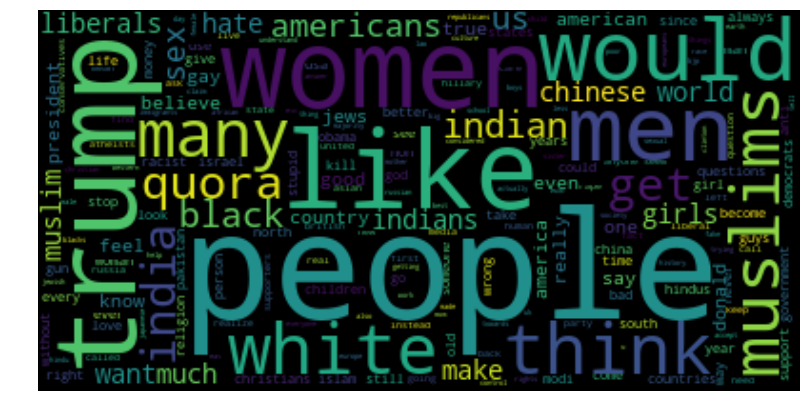

In [125]:
words_ins = []

# Add to words_ns all words that are in words but not in sw
for word in words_insincere:
    if word not in sw:
        words_ins.append(word)

# Create freq dist and plot
freqdist_ins = nltk.FreqDist(words_ins)

# here I add a word cloud graphics which shows the most common words

wcloud_ins = WordCloud().generate_from_frequencies(freqdist_ins)
plt.figure(figsize=(16,7))
plt.imshow(wcloud_ins, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show() 

-->  people
-->  trump
-->  women
-->  like
-->  men
-->  would
-->  think
-->  white
-->  muslims
-->  many
-->  quora
-->  india
-->  get
-->  indian
-->  black
-->  americans
-->  us
-->  sex
-->  girls
-->  indians
-->  world
-->  want
-->  hate
-->  liberals
-->  chinese
-->  muslim


<Figure size 432x288 with 0 Axes>

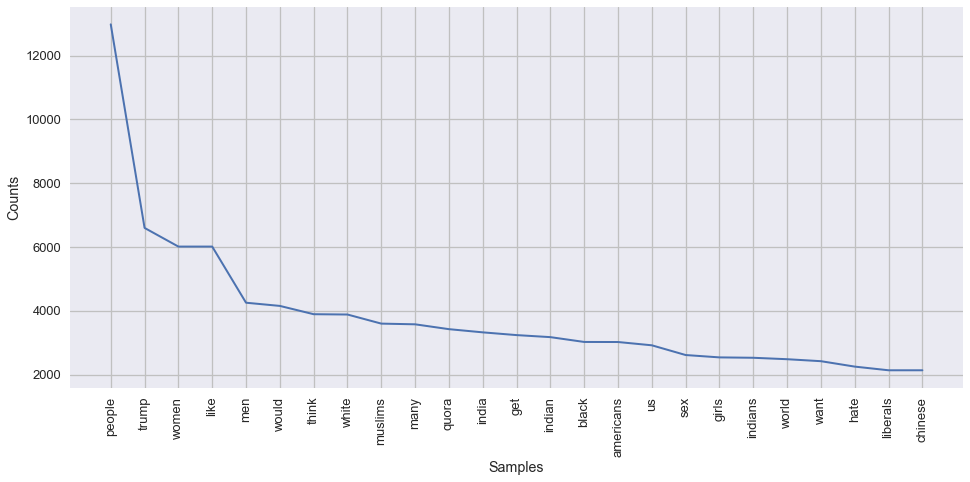

In [155]:
### Here we plot the frequency of the first 25 most popular words
# plot the frequency of the words in insincere questions
# adjust the plot margins.
plt.subplots_adjust(left=0.15, bottom=0.25, right=0.9, top=0.8)
plt.figure(figsize=(16,7))
# Figures inline and set visualization style
# matplotlib inline
sns.set_context("talk")


# Create freq dist and plot
freqdist_ins = nltk.FreqDist(words_ins)
freqdist_ins.plot(25)

In [164]:
# get 25 most frequent words 
count = 0
most_frequent_25 = []
for i in freqdist_ins.most_common(): 
    print('--> ',i[0])
    most_frequent_25.append(i[0])
    count = count +1
    if count > 25:
        break

-->  people
-->  trump
-->  women
-->  like
-->  men
-->  would
-->  think
-->  white
-->  muslims
-->  many
-->  quora
-->  india
-->  get
-->  indian
-->  black
-->  americans
-->  us
-->  sex
-->  girls
-->  indians
-->  world
-->  want
-->  hate
-->  liberals
-->  chinese
-->  muslim


In [22]:
# NER 
# Tokenize the article into sentences: sentences
'''
sentences = sent_tokenize(allwords_insincere)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences

chunked_sentences = ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
# find NER (NAmed Entity Recognition)
ner = []
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            ner.append(chunk)

print(ner)            

# find POS 

pos = []
for sent in chunked_sentences:
     for chunk in sent:
        if hasattr(chunk, "label") == False:
            pos.append(str(chunk[1]))
           #print('chunk = '+str(chunk[0])+' ,'+str(chunk[1]))    

print(len(pos))
from collections import Counter
d = {}
d = Counter(pos)
d.most_common()
'''

'\nsentences = sent_tokenize(allwords_insincere)\n\n# Tokenize each sentence into words: token_sentences\ntoken_sentences = [word_tokenize(sent) for sent in sentences]\n\n# Tag each tokenized sentence into parts of speech: pos_sentences\npos_sentences = [pos_tag(sent) for sent in token_sentences]\n\n# Create the named entity chunks: chunked_sentences\n\nchunked_sentences = ne_chunk_sents(pos_sentences, binary=True)\n\n# Test for stems of the tree with \'NE\' tags\n# find NER (NAmed Entity Recognition)\nner = []\nfor sent in chunked_sentences:\n    for chunk in sent:\n        if hasattr(chunk, "label") and chunk.label() == "NE":\n            ner.append(chunk)\n\nprint(ner)            \n\n# find POS \n\npos = []\nfor sent in chunked_sentences:\n     for chunk in sent:\n        if hasattr(chunk, "label") == False:\n            pos.append(str(chunk[1]))\n           #print(\'chunk = \'+str(chunk[0])+\' ,\'+str(chunk[1]))    \n\nprint(len(pos))\nfrom collections import Counter\nd = {}\nd = C